In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [57]:
df1 = pd.read_csv(r"C:\Users\parth\Downloads\Mumbai House Prices.csv")
df1.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [58]:
df1.shape

(76038, 9)

In [59]:
df2 = df1.drop(['type','status','locality','age'],axis='columns')
df2.shape

(76038, 5)

In [61]:
df2.isnull().sum()

bhk           0
area          0
price         0
price_unit    0
region        0
dtype: int64

In [70]:
df2.loc[df2['price_unit'] == "Cr", 'price'] *= 100

In [71]:
df2.head()

,bhk,area,price,price_unit,region
0,3,685,250.00,Cr,Andheri West
1,2,640,52.51,L,Naigaon East
2,2,610,173.00,Cr,Borivali West
3,2,876,59.98,L,Panvel
4,2,659,94.11,L,Mira Road East


In [72]:
df2

,bhk,area,price,price_unit,region
0,3,685,250.00,Cr,Andheri West
1,2,640,52.51,L,Naigaon East
2,2,610,173.00,Cr,Borivali West
3,2,876,59.98,L,Panvel
4,2,659,94.11,L,Mira Road East
...,...,...,...,...,...
76033,3,1527,700.00,Cr,Juhu
76034,5,3049,1200.00,Cr,Juhu
76035,4,3313,1000.00,Cr,Napeansea Road
76036,2,1305,425.00,Cr,Bandra East


In [73]:
df3 = df2.drop(['price_unit'],axis='columns')
df3.head()

,bhk,area,price,region
0,3,685,250.00,Andheri West
1,2,640,52.51,Naigaon East
2,2,610,173.00,Borivali West
3,2,876,59.98,Panvel
4,2,659,94.11,Mira Road East


In [74]:
df3.shape

(76038, 4)

In [75]:
df3.bhk.unique()

array([ 3,  2,  5,  1,  4,  6,  9,  8, 10,  7], dtype=int64)

In [76]:
df3.area.unique()

array([ 685,  640,  610, ..., 1974, 1634, 3049], dtype=int64)

In [77]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [78]:
df3[~df3['area'].apply(is_float)].head(10)

,bhk,area,price,region


In [79]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['area']
df4.head()

,bhk,area,price,region,price_per_sqft
0,3,685,250.00,Andheri West,36496.350365
1,2,640,52.51,Naigaon East,8204.687500
2,2,610,173.00,Borivali West,28360.655738
3,2,876,59.98,Panvel,6847.031963
4,2,659,94.11,Mira Road East,14280.728376


In [88]:
len(df4.region.unique())

228

In [83]:
df4.region = df4.region.apply(lambda x: x.strip())
region_stats = df4['region'].value_counts(ascending=False)
region_stats

Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: region, Length: 228, dtype: int64

In [89]:
len(region_stats[region_stats<=10])

114

In [92]:
region_stats_less_than_10 = region_stats[region_stats<=10]
region_stats_less_than_10

Kanjurmarg East      10
Vasind               10
Sector 20 Kamothe    10
Koproli              10
Cuffe Parade          9
                     ..
Police Colony         1
GTB Nagar             1
Bandra                1
Sector 14 Vashi       1
Goregaon              1
Name: region, Length: 114, dtype: int64

In [93]:
len(df4.region.unique())

228

In [95]:
df4.region = df4.region.apply(lambda x: 'other' if x in region_stats_less_than_10 else x)
len(df4.region.unique())

115

In [96]:
df4.head(10)

,bhk,area,price,region,price_per_sqft
0,3,685,250.00,Andheri West,36496.350365
1,2,640,52.51,Naigaon East,8204.687500
2,2,610,173.00,Borivali West,28360.655738
3,2,876,59.98,Panvel,6847.031963
4,2,659,94.11,Mira Road East,14280.728376
5,2,826,330.00,Parel,39951.573850
6,5,2921,199.00,Boisar,6812.735365
7,3,778,289.00,Santacruz East,37146.529563
8,1,396,29.84,Badlapur East,7535.353535
9,2,671,272.00,other,40536.512668


In [98]:
df4[df4.area/df4.bhk<300].head()

,bhk,area,price,region,price_per_sqft
0,3,685,250.0,Andheri West,36496.350365
7,3,778,289.0,Santacruz East,37146.529563
12,3,753,177.0,Chembur,23505.976096
18,2,555,142.0,Thane West,25585.585586
20,2,582,149.0,Vikhroli,25601.374570


In [99]:
df4.shape

(76038, 5)

In [102]:
df5 = df4[~(df4.area/df4.bhk<300)]
df5.shape

(71567, 5)

In [104]:
df5.price_per_sqft.describe()

count     71567.000000
mean      14946.070563
std        9379.789589
min         646.766169
25%        8455.882353
50%       12727.272727
75%       19165.727170
max      182307.692308
Name: price_per_sqft, dtype: float64

In [105]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('region'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(53873, 5)

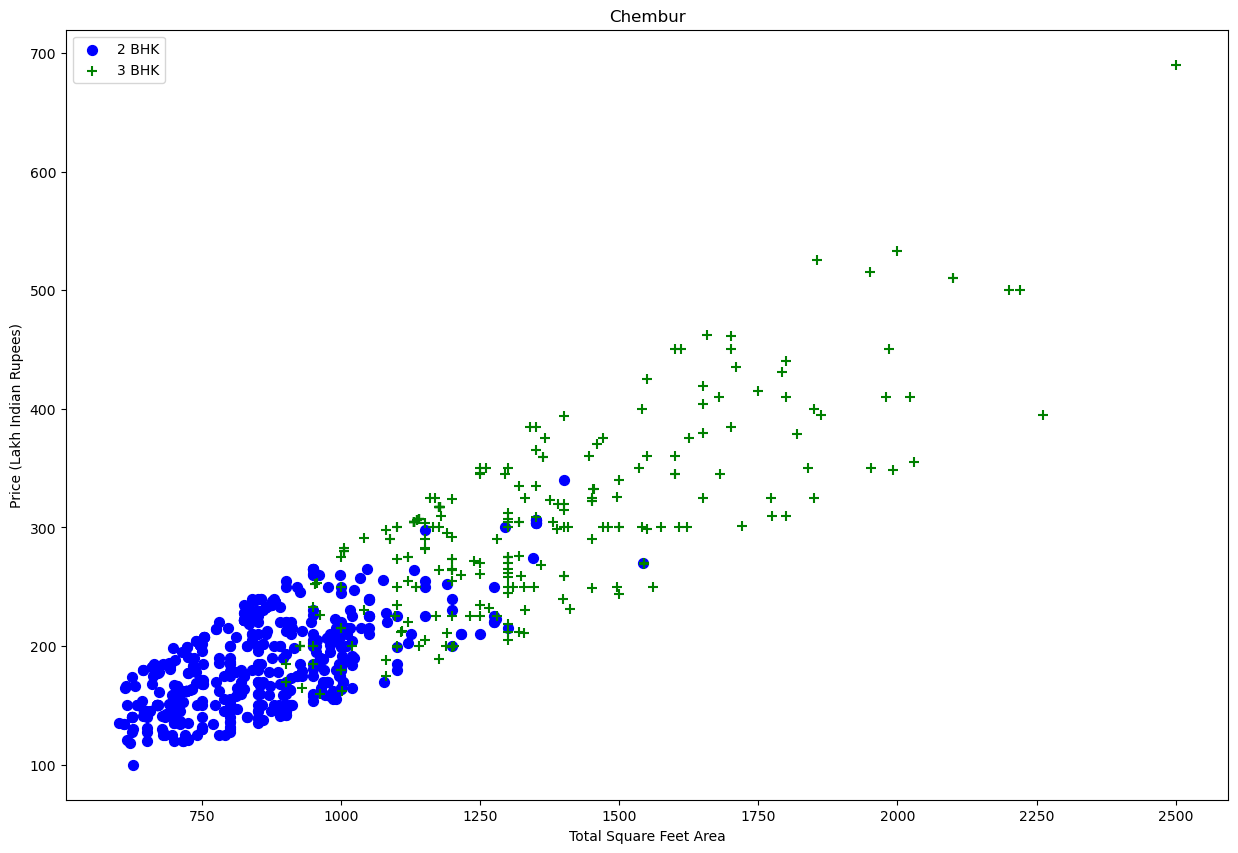

In [110]:
def plot_scatter_chart(df,region):
    bhk2 = df[(df.region==region) & (df.bhk==2)]
    bhk3 = df[(df.region==region) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(region)
    plt.legend()
    
plot_scatter_chart(df6,"Chembur")

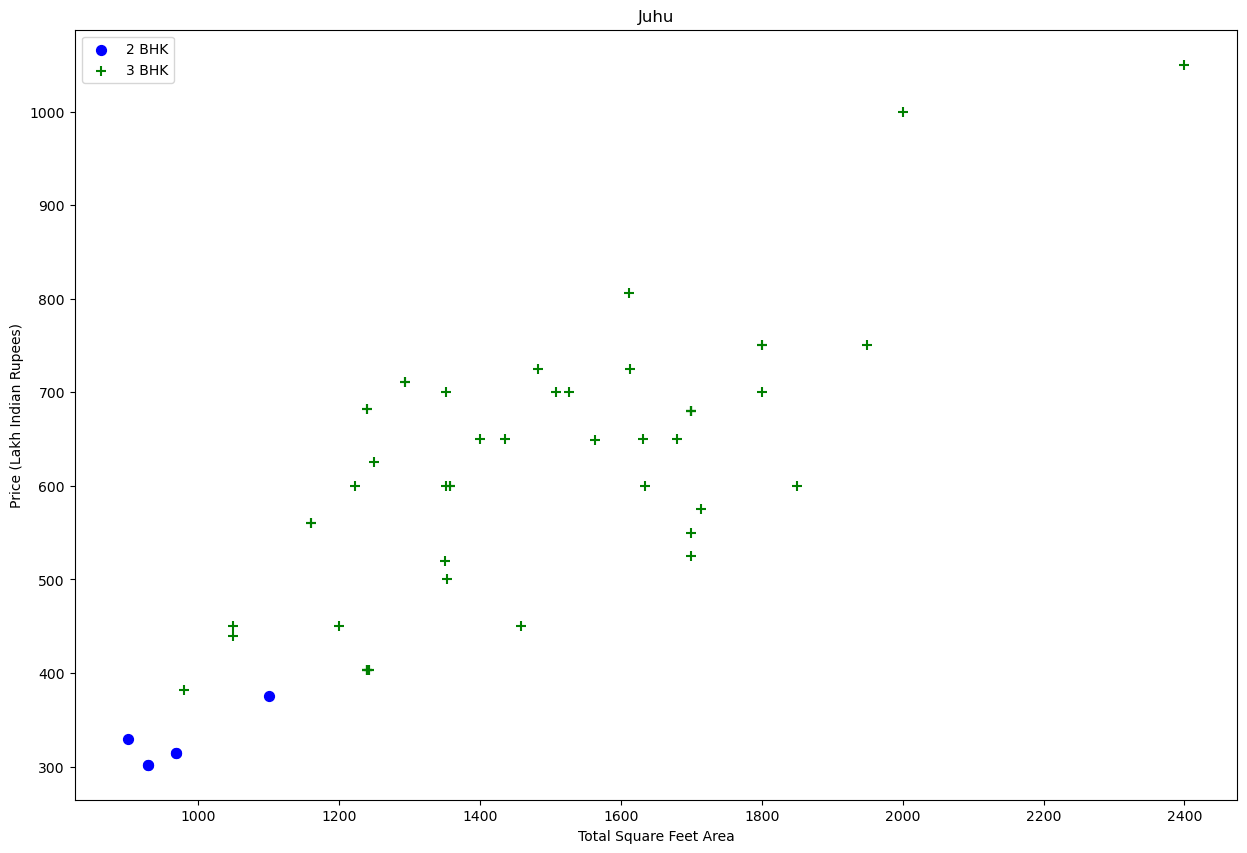

In [111]:
plot_scatter_chart(df6,"Juhu")

In [112]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for region, region_df in df.groupby('region'):
        bhk_stats = {}
        for bhk, bhk_df in region_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in region_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(36801, 5)

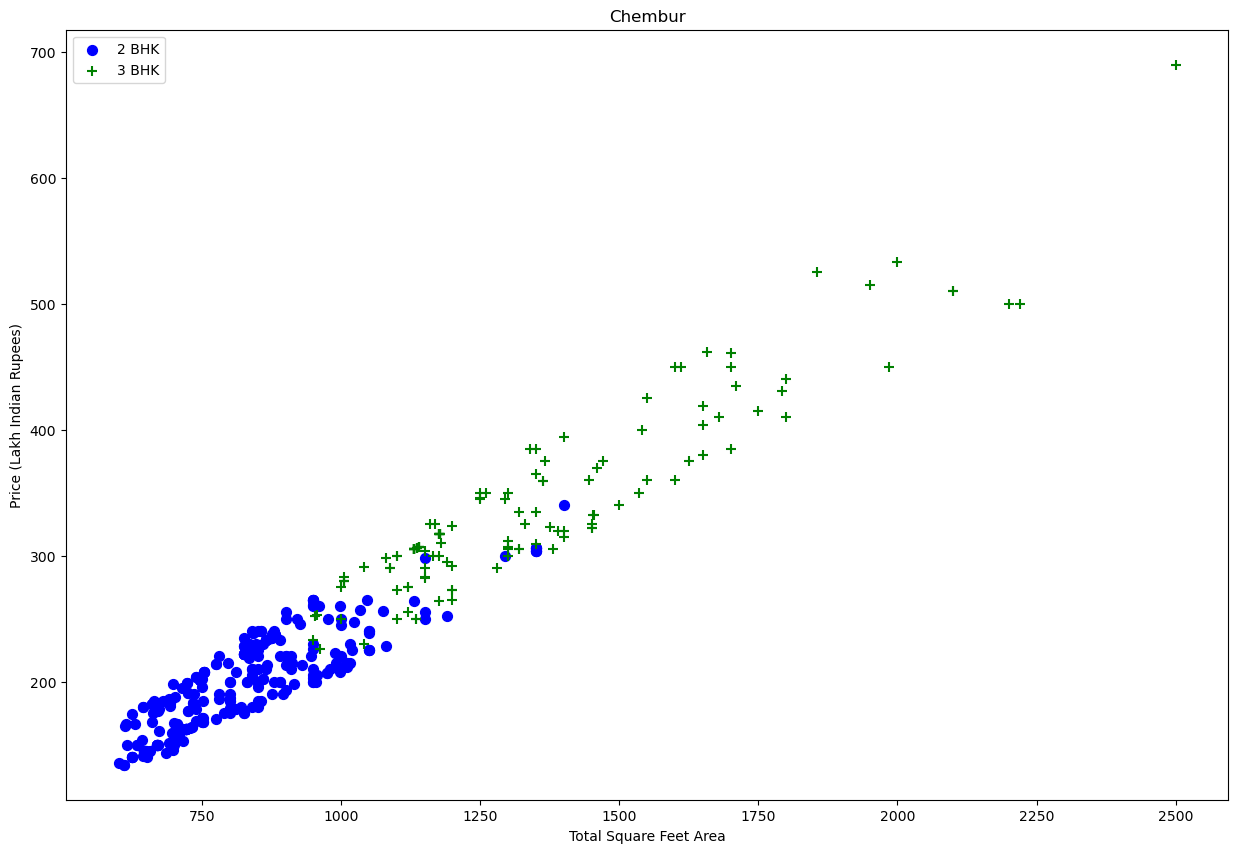

In [138]:
plot_scatter_chart(df7,"Chembur")

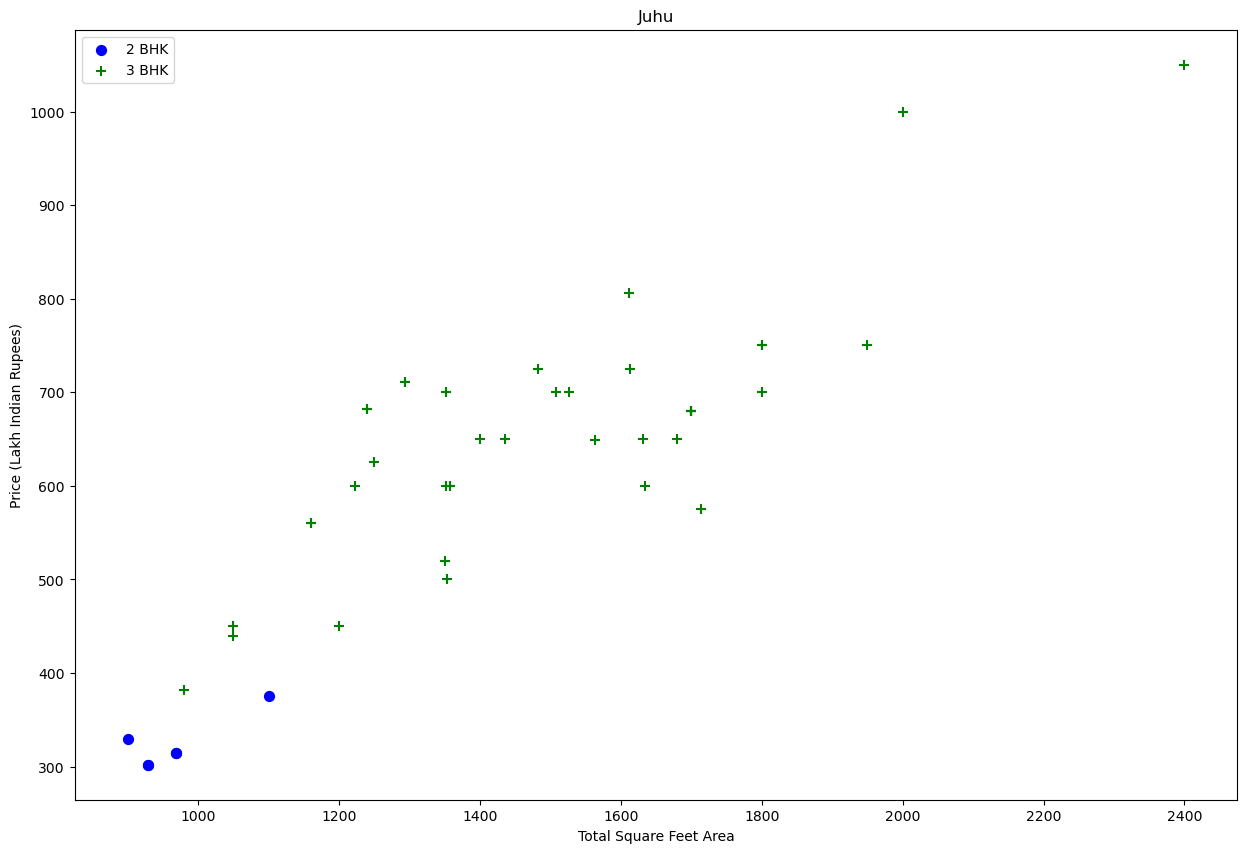

In [139]:
plot_scatter_chart(df7,"Juhu")

Text(0, 0.5, 'Count')

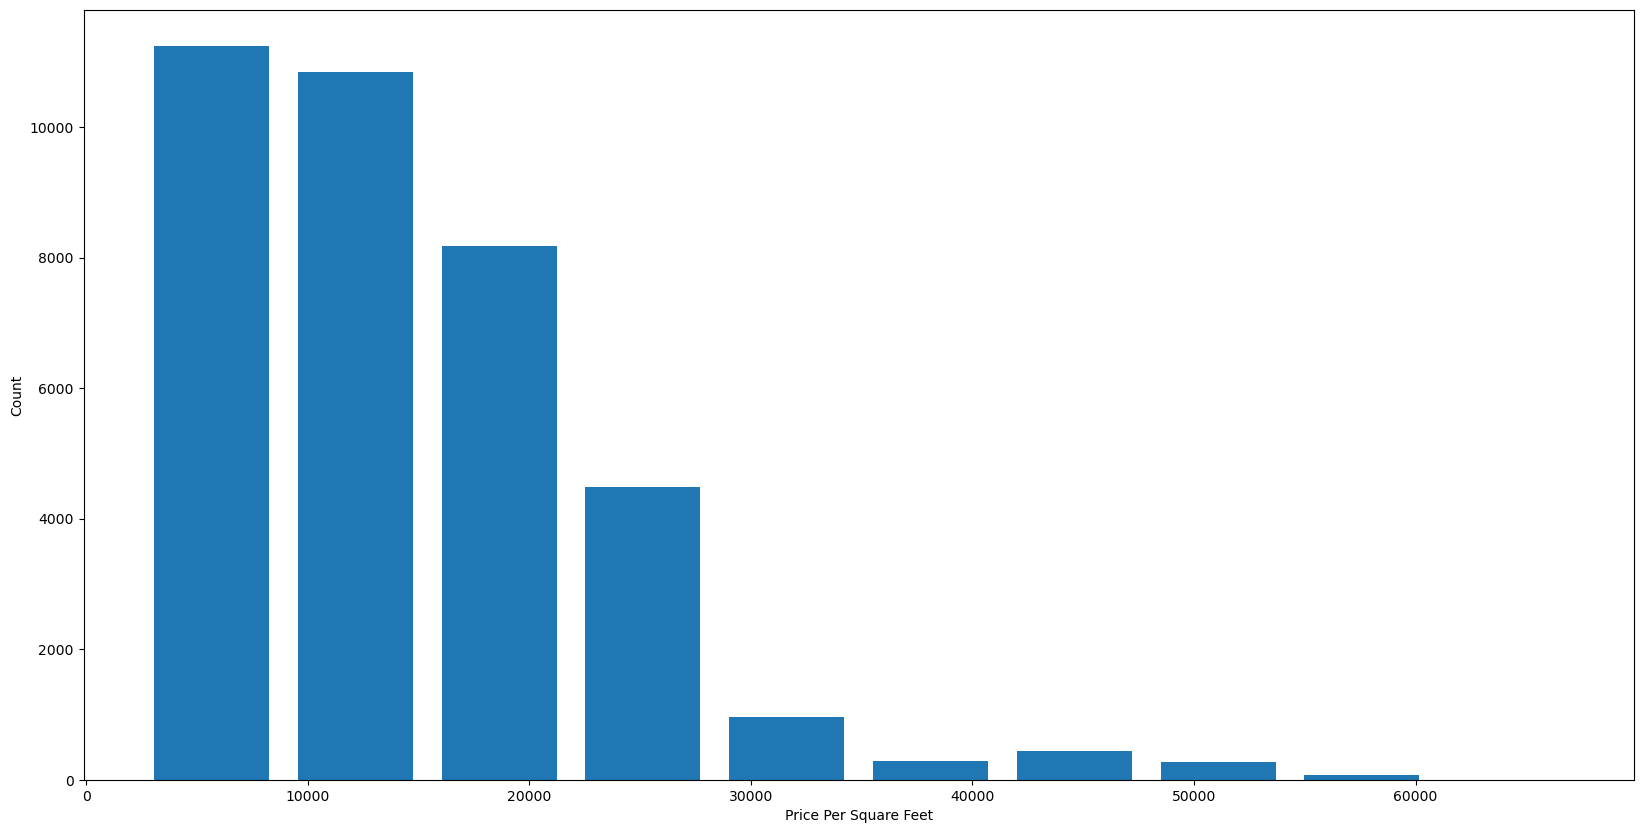

In [115]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [117]:
dummies = pd.get_dummies(df7.region)
dummies.head(3)

,Agripada,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,Badlapur East,Badlapur West,...,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,bhk,area,price,region,price_per_sqft,Agripada,Airoli,Ambarnath,Ambernath East,Ambernath West,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,650,262.0,Agripada,40307.692308,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,803,225.0,Agripada,28019.925280,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,684,170.0,Agripada,24853.801170,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,545,160.0,Agripada,29357.798165,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4,3454,1250.0,Agripada,36189.924725,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
df9=df8.drop(['region'],axis='columns')
df9.head()

,bhk,area,price,price_per_sqft,Agripada,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri East,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,650,262.0,40307.692308,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,803,225.0,28019.925280,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,684,170.0,24853.801170,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,545,160.0,29357.798165,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4,3454,1250.0,36189.924725,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
X = df9.drop(['price','price_per_sqft'],axis='columns')
X.head()

,bhk,area,Agripada,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,650,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,803,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,684,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,545,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4,3454,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
y = df9.price

In [237]:
len(y)

36801

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [250]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8916997860484493

In [251]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.87902574, 0.87855999, 0.88291345, 0.88372214, 0.86489675])

In [252]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.877824,{}
1,lasso,0.719341,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.952693,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [254]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [256]:
dt_regressor.score(X_test, y_test)

0.9984880348407064

In [261]:
def predict_price(location,bhk,sqft):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [265]:
predict_price('Agripada',2,650)

C:\Users\parth\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


280.95701487426936

In [267]:
predict_price('Agripada',1,545)

C:\Users\parth\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


273.06363574673503

In [268]:
predict_price('Agripada',1,684)

C:\Users\parth\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


307.36390241537913

In [269]:
predict_price('Juhu',1,545)

C:\Users\parth\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


601.5852252147777

In [271]:
import pickle
with open('mumbai_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [273]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))